<a href="https://colab.research.google.com/github/anutishah/project_gss/blob/main/gss_project_visualization_withstats_analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1: GSS**

**Summary:**  For this project, we explored the following research question: What association is there between total family income bracket, education level, and public opinion on financial support for mass transportation of respondents in the 2022 General Social Survey? To conduct our analysis, we investigated the variables INCOME, EDUC, and NATMASS in the 2022 General Social Survey. INCOME is a numeric variable that groups respondents’ total family income last fall before taxes and shows the count and percentage of respondents in each of the groups. EDUC is a numeric variable that shows the count and percentage of respondents at each level of education. NATMASS is a numeric variable that shows the count and percentage of respondents who think we are spending too much, too little, or the right amount on mass transportation. Our research process consisted of data wrangling, exploratory data analysis, and visualization. As part of data wrangling, we ensured our dataset was clean and ready for analysis by dropping all the instances with invalid entries or NaN values under each variable because they were not valid labels according to the codebook. After our data was cleaned and ready for exploration, we conducted the exploratory data analysis by comparing two variables with each other and finding the top value and its frequency. Additionally, for each variable, we calculated the normalization mean and variance. With these statistics, we moved to the visualization stage where we displayed our data using histograms for each variable, and between 2 variables. To compare all 3 variables, we used a histogram, a scatterplot, and a joint plot. Overall, looking at all the data we collected and the visualizations we created, a strong association between income, education, and opinion on financial support for mass transportation is not evident. We saw that most respondents believe that financial support on mass transportation is about right regardless of education level or income bracket and a large percentage of respondents have a family income level of above $25000 regardless of education level. However, when looking at education vs public opinion some trends are visible. As education level increases public opinion starts shifting from about right to too little: respondents with an education level of 1st grade through 2 years of college believe financial support is about right while respondents with an education level from 4 years of college to 8 years of college believe financial support is too little.



**Data:** Our research question focused on analyzing the 2022 GSS dataset to explore the association between total family income bracket, education level, and public opinion on financial support for mass transportation. The key variables were INCOME, EDUC, and NATMASS. INCOME is a numeric variable that showed the respondents’ total family income last fall before taxes and grouped them into income brackets, each representing a range of income levels. There were a total of 12 brackets: UNDER $1000 (represented by the number 1), $1000 TO $2999 (represented by the number 2), $3000 TO $3999 (represented by the number 3), $4000 TO $4999 (represented by the number 4), $5000 TO $5999 (represented by the number 5), $6000 TO $6999 (represented by the number 6), $7000 TO $7999 (represented by the number 7), $8000 TO $9999 (represented by the number 8), $10000 TO $14999 (represented by the number 9), $15000 TO $19999 (represented by the number 10), $20000 TO 24999 (represented by the number 11), AND $25000 OR MORE (represented by the number 12). EDUC is a numeric variable that categorizes the respondents based on their level of education. The labels are NO FORMAL SCHOOLING (represented by the number 0), 1ST GRADE (represented by the number 1), 2ND GRADE (represented by the number 2), 3RD GRADE (represented by the number 3), 4TH GRADE (represented by the number 4), 5TH GRADE (represented by the number 5), 6TH GRADE (represented by the number 6), 7TH GRADE (represented by the number 7), 8TH GRADE (represented by the number 8), 9TH GRADE (represented by the number 9), 10TH GRADE (represented by the number 10), 11TH GRADE (represented by the number 11), 12TH GRADE (represented by the number 12), 1 YEAR OF COLLEGE (represented by the number 13), 2 YEARS OF COLLEGE (represented by the number 14), 3 YEARS OF COLLEGE (represented by the number 15), 4 YEARS OF COLLEGE (represented by the number 16), 5 YEARS OF COLLEGE (represented by the number 17), 6 YEARS OF COLLEGE (represented by the number 18), 7 YEARS OF COLLEGE (represented by the number 19), an 8 YEARS OF COLLEGE (represented by the number 20). Our final variable NATMASS, is a numeric variable that indicated the respondents’ opinions on whether the current financial support for mass transportation was too much (represented by the number 1), too little (represented by the number 2), or about right (represented by the number 3).  

To obtain this data, we downloaded each chuck of data from each variable, extracted the specific variable we needed from each chuck, and saved them to a combined CSV file. Then, we used Python’s pandas and numpy library to do data wrangling so that our data was clean, making it easy to work with and conduct analysis on. Our data came in relatively clean, however, there were some missing values and rows with the invalid label of ‘income’ under the INCOME variable, ‘educ’ under the EDUC variable, and ‘natmass’ under the NATMASS variable. To clean this up, we replaced all the values of  ‘income’ with NaN values and removed any row containing a NaN value. We then printed all the unique values and counts for each variable to ensure that all missing and invalid values were removed from the dataset, leaving us with all valid data values and an overall cleaned dataset.

The biggest challenge we had when dealing with data wrangling was trying to distinguish between valid and invalid labels. At first, we thought the only invalid data we had were NaN values but after further analysis, we realized that some rows had variable names. When looking back at the codebook and the documentation, we saw that this was invalid data. Thus, we decided that these rows should be removed completely from our dataset as none of the data in the row was usable. It was also a challenge to figure out how to merge each chunk of data as we had no previous experience with doing this. However, after looking at the example code provided and reading the comments, we figured out how to load each chunk of memory and combine them into a single csv file.

In [8]:
! git clone https://www.github.com/DS3001/project_gss

fatal: destination path 'project_gss' already exists and is not an empty directory.


In [9]:
import pandas as pd
import numpy as np


#
var_list = ['income', 'educ', 'natmass'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
     # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    df.head() # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

df1 = pd.read_csv('/content/selected_gss_data.csv', low_memory=False)
print(df1) #uncleaned data

df1['income'] = df1['income'].replace('income',np.nan) #replaces income with NaN since it is not a valid label for this variable
print(df1.isna().sum()) #sums how many missing/invalid values there are for each variable
df1_cleaned = df1.dropna(subset = var_list)#removes any row containing NaN value - these values are missing or invalid according to codebook


#prints list of labels and counts for each label (each variable)
print(df1_cleaned['income'].unique(), '\n')
print(df1_cleaned['income'].value_counts(), '\n')
print(df1_cleaned['educ'].unique(),'\n')
print(df1_cleaned['educ'].value_counts(), '\n')
print(df1_cleaned['natmass'].unique(),'\n')
print(df1_cleaned['natmass'].value_counts(), '\n')

print(df1_cleaned)#all cleaned data


                income  educ     natmass
0                  NaN  16.0         NaN
1                  NaN  10.0         NaN
2                  NaN  12.0         NaN
3                  NaN  17.0         NaN
4                  NaN  12.0         NaN
...                ...   ...         ...
72387  $25,000 or more  12.0  too little
72388  $25,000 or more  19.0  too little
72389  $25,000 or more  15.0  too little
72390  $25,000 or more  17.0  too little
72391  $25,000 or more  20.0  too little

[72392 rows x 3 columns]
income      8953
educ         263
natmass    22089
dtype: int64
['$25,000 or more' '$10,000 to $14,999' '$20,000 to $24,999'
 '$15,000 to $19,999' '$5,000 to $5,999' '$3,000 to $3,999'
 '$6,000 to $6,999' '$7,000 to $7,999' '$1,000 to $2,999'
 '$8,000 to $9,999' 'under $1,000' '$4,000 to $4,999'] 

$25,000 or more       29682
$20,000 to $24,999     3614
$10,000 to $14,999     3607
$15,000 to $19,999     3069
$8,000 to $9,999       1104
$1,000 to $2,999        646
$7,000 to $7,9

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Individual histograms

<ipython-input-11-0b3659cb1d1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['income']= pd.Categorical(df1_cleaned['income'],


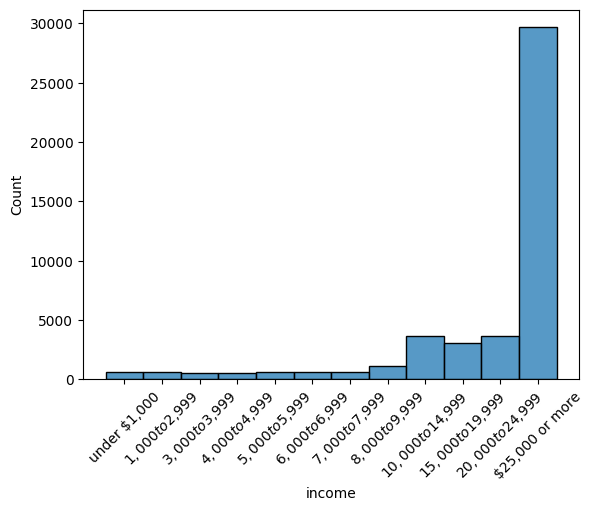

<ipython-input-11-0b3659cb1d1e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['educ']= pd.Categorical(df1_cleaned['educ'],


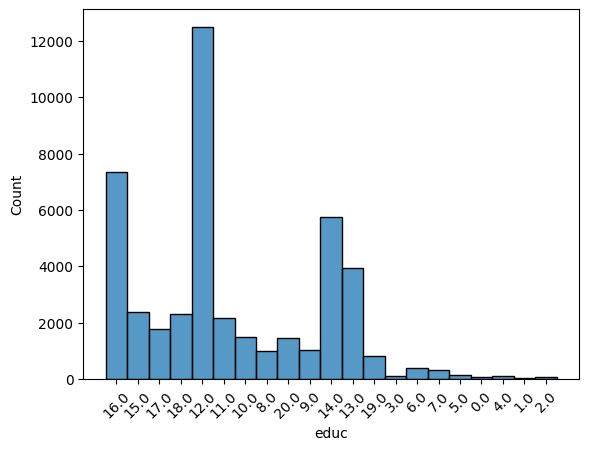

<ipython-input-11-0b3659cb1d1e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['natmass']= pd.Categorical(df1_cleaned['natmass'],


<function matplotlib.pyplot.show(close=None, block=None)>

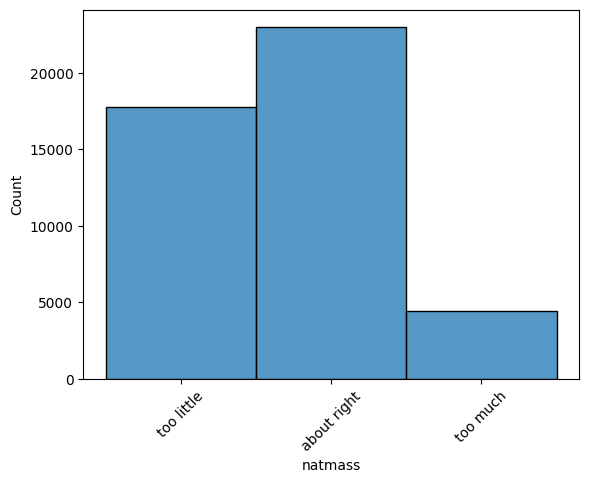

In [11]:
### income histogram ###
df1_cleaned['income']= pd.Categorical(df1_cleaned['income'],
              ['under $1,000',
                '$1,000 to $2,999',
                '$3,000 to $3,999',
                '$4,000 to $4,999',
                '$5,000 to $5,999',
                '$6,000 to $6,999',
                '$7,000 to $7,999',
                '$8,000 to $9,999',
                '$10,000 to $14,999',
                '$15,000 to $19,999',
                '$20,000 to $24,999',
                '$25,000 or more']) # order df1_cleaned by increasing income
sns.histplot(df1_cleaned['income']) # create histogram with x as income
plt.xticks(rotation=45) # tilt x axis values
plt.show()

### educ histogram ###
sns.histplot(df1_cleaned['educ']) # create histogram with x as educ
df1_cleaned['educ']= pd.Categorical(df1_cleaned['educ'],
                  ['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0',
                   '10.0','11.0','12.0','13.0','14.0','15.0','16.0','17.0',
                   '18.0','19.0','20.0']) # order df1 by increasing education level
plt.xticks(rotation=45) # tilt x axis values
plt.show()

### natmass histogram ###
sns.histplot(df1_cleaned['natmass']) # create histogram with x as natmass
df1_cleaned['natmass']= pd.Categorical(df1_cleaned['natmass'],
                  ['too little', 'about right', 'too much']) # order df1 by increasing education level
plt.xticks(rotation=45) # tilt x axis values
plt.show

Family income vs opinion on mass transport


<ipython-input-12-ccb3a9a21377>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['income']= pd.Categorical(df1_cleaned['income'],


Text(0.5, 1.0, 'Family income vs opinion on mass transportation financial support')

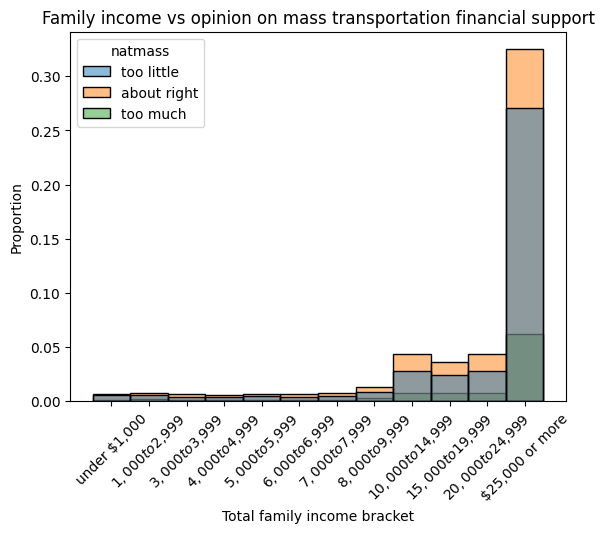

In [12]:
df1_cleaned['income']= pd.Categorical(df1_cleaned['income'],
              ['under $1,000',
                '$1,000 to $2,999',
                '$3,000 to $3,999',
                '$4,000 to $4,999',
                '$5,000 to $5,999',
                '$6,000 to $6,999',
                '$7,000 to $7,999',
                '$8,000 to $9,999',
                '$10,000 to $14,999',
                '$15,000 to $19,999',
                '$20,000 to $24,999',
                '$25,000 or more']) # order df1_cleaned by increasing income

sns.histplot(data=df1_cleaned, x='income',
             hue = 'natmass',
             stat='proportion') # create grouped histogram with x as income and hue as natmass
plt.xticks(rotation=45) # rotate x axis values
plt.xlabel("Total family income bracket") # name x axis label
plt.ylabel("Proportion") # name y axis label
plt.title("Family income vs opinion on mass transportation financial support")

Education level vs opinion on mass transport


<ipython-input-13-d810ba90da47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['educ']= pd.Categorical(df1_cleaned['educ'],


Text(0.5, 1.0, 'Education level vs opinion on mass transportation financial support')

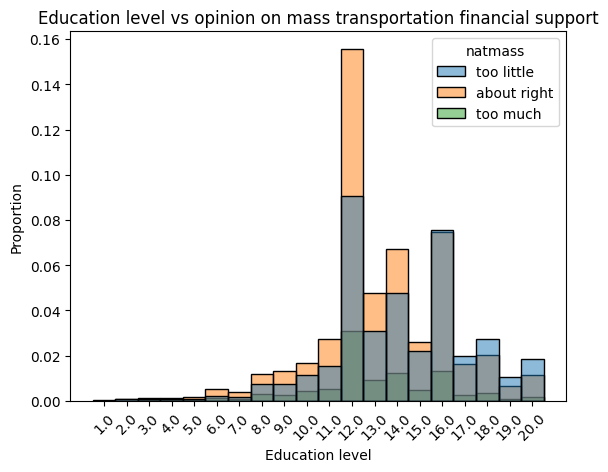

In [13]:
df1_cleaned['educ']= pd.Categorical(df1_cleaned['educ'],
                  ['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0','16.0','17.0','18.0','19.0','20.0']) # order df1 by increasing education level
sns.histplot(data=df1_cleaned, x='educ', hue = 'natmass', stat='proportion') # create histogram with x as educ and hue as natmass
plt.xticks(rotation=45) # rotate x axis values
plt.xlabel("Education level") # name x axis label
plt.ylabel("Proportion") # name y axis label
plt.title("Education level vs opinion on mass transportation financial support")


Family income vs education level


Text(0.5, 1.0, 'Education level vs family income')

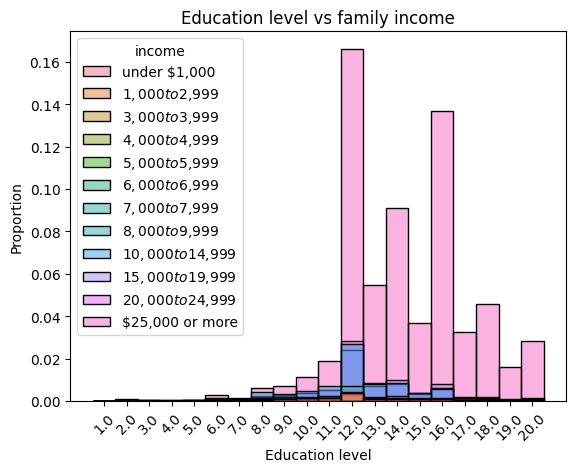

In [14]:
sns.histplot(data=df1_cleaned, x='educ', hue = 'income', stat='proportion') # create grouped histogram with x as educ and hue as income
plt.xticks(rotation=45) # rotate x axis values
plt.xlabel("Education level") # name x axis label
plt.ylabel("Proportion") # name y axis label
plt.title("Education level vs family income")

The cross-tabulation of respondents’ education levels against family income revealed surprisingly nuanced trends about the influence of education level on the total family income bracket. The data reveals that respondents with a range of income brackets can be found in each educational level suggesting that educational attainment is not uniform within a specific income bracket and that there are probably factors beyond education that contribute to income disparities. However, we do see that in some education levels, specific income brackets emerge as more prevalent. For example, respondents with an income of $25000 or more exhibit a diverse range of education levels but there is a higher frequency of those with an education level of completing 12th grade (educ = 12), 4 years of college (educ = 16), and 2 years of college (educ = 14), and a lower frequency of those with an education level of completing 1st grade (educ = 1), no school (educ = 0), 3rd grade (educ = 3) and 4th grade (educ = 4). This suggests a positive correlation between completing at least a high school level of education and achieving a higher family income level.

Additionally, it was surprising to see that despite every education level having a top income value of $25000 or more, an education level of completing 5th grade (educ = 5), had a top income value of only $10000 to 14999. This might have been because only 23 out of a total of 45124 respondents had an education level of only completing 5th grade. This limited representation might have contributed to a narrower spread of income brackets for respondents with this education level, with fewer individuals falling into higher income categories such as an income bracket of $25000 or more.

Compare all three variables

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0')])

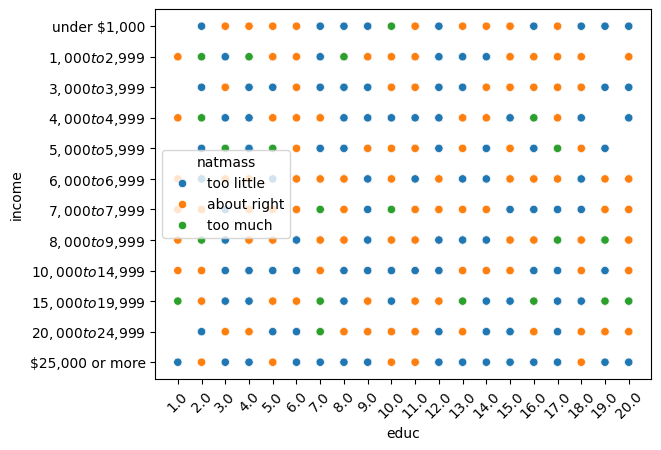

In [15]:
sns.scatterplot(data=df1_cleaned,x='educ',y='income', hue='natmass') # create scatterplot comparing all three values with hue as natmass
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0')])

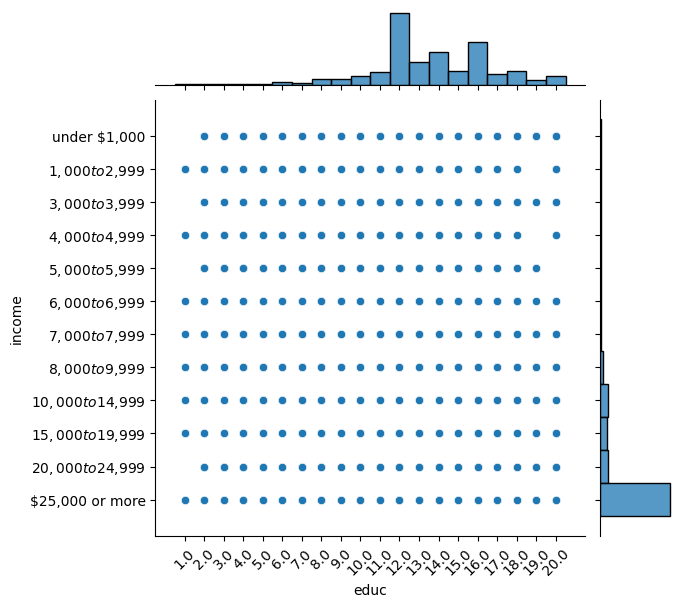

In [16]:
sns.jointplot(data=df1_cleaned,x='educ',y='income') # create jointplot with x as educ and y as income
plt.xticks(rotation=45)

# **Statistics**

In [17]:
df1_cleaned.describe()

,income,educ,natmass
count,45124,45061,45124
unique,12,20,3
top,"$25,000 or more",12.0,about right
freq,29682,12495,22969


In [18]:
df1_cleaned.loc[:, ['income', 'educ']].groupby('income').describe()

educ                   
                    count unique   top  freq
income                                      
under $1,000          596     19  12.0   170
$1,000 to $2,999      643     19  12.0   194
$3,000 to $3,999      521     19  12.0   140
$4,000 to $4,999      494     19  12.0   130
$5,000 to $5,999      591     18  12.0   156
$6,000 to $6,999      568     20  12.0   160
$7,000 to $7,999      611     20  12.0   171
$8,000 to $9,999     1102     20  12.0   321
$10,000 to $14,999   3598     20  12.0  1215
$15,000 to $19,999   3062     20  12.0  1075
$20,000 to $24,999   3609     19  12.0  1281
$25,000 or more     29666     20  12.0  7482

In [19]:
df1_cleaned.loc[:, ['income', 'educ']].groupby('educ').describe()

income                                 
      count unique                 top  freq
educ                                        
1.0      20      8     $25,000 or more     9
2.0      76     12     $25,000 or more    32
3.0     104     12     $25,000 or more    22
4.0     103     12     $25,000 or more    22
5.0     124     12  $10,000 to $14,999    23
6.0     394     12     $25,000 or more   117
7.0     303     12     $25,000 or more    71
8.0    1001     12     $25,000 or more   276
9.0    1044     12     $25,000 or more   319
10.0   1475     12     $25,000 or more   515
11.0   2175     12     $25,000 or more   859
12.0  12495     12     $25,000 or more  7482
13.0   3939     12     $25,000 or more  2463
14.0   5737     12     $25,000 or more  4109
15.0   2385     12     $25,000 or more  1651
16.0   7361     12     $25,000 or more  6164
17.0   1772     12     $25,000 or more  1477
18.0   2297     12     $25,000 or more  2052
19.0    817     10     $25,000 or more   730
20.0   1439     11     $25,000 or more  1276

In [20]:
df1_cleaned.loc[:, ['income', 'natmass']].groupby('income').describe()

natmass                           
                     count unique          top   freq
income                                               
under $1,000           598      3  about right    292
$1,000 to $2,999       646      3  about right    326
$3,000 to $3,999       526      3  about right    285
$4,000 to $4,999       498      3  about right    261
$5,000 to $5,999       594      3  about right    293
$6,000 to $6,999       572      3  about right    319
$7,000 to $7,999       614      3  about right    343
$8,000 to $9,999      1104      3  about right    592
$10,000 to $14,999    3607      3  about right   1986
$15,000 to $19,999    3069      3  about right   1629
$20,000 to $24,999    3614      3  about right   1986
$25,000 or more      29682      3  about right  14657

In [21]:
df1_cleaned.loc[:, ['educ', 'natmass']].groupby('educ').describe()

natmass                          
       count unique          top  freq
educ                                  
1.0       20      3  about right    12
2.0       76      3  about right    38
3.0      104      3  about right    53
4.0      103      3  about right    52
5.0      124      3  about right    73
6.0      394      3  about right   232
7.0      303      3  about right   181
8.0     1001      3  about right   537
9.0     1044      3  about right   591
10.0    1475      3  about right   758
11.0    2175      3  about right  1229
12.0   12495      3  about right  7011
13.0    3939      3  about right  2144
14.0    5737      3  about right  3022
15.0    2385      3  about right  1166
16.0    7361      3   too little  3404
17.0    1772      3   too little   906
18.0    2297      3   too little  1226
19.0     817      3   too little   473
20.0    1439      3   too little   837